# **HW1 - Lab: LMS Algorithm**
## Elisa Chen 
### Duke NetID: eyc11

**Lab 1**:

In [132]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
from numpy.linalg import inv
import matplotlib.pyplot as plt

# Loading dataset
data = loadmat('dataset.mat')
X = np.matrix(data['X']) # features and constant
D = np.matrix(data['D']) # target

### 5a)

In [133]:
# a)
W_optimal = inv((X.T @ X)) @ X.T @ D
print("The optimal weight W* is:\n", W_optimal)

K = len(X)
errors = np.sum(0.5 * np.square(D - (X @ W_optimal))) / K
print("The MSE loss of the dataset is when W* is used is:\n", errors)

The optimal weight W* is:
 [[ 1.0006781 ]
 [ 1.00061145]
 [-2.00031968]]
The MSE loss of the dataset is when W* is used is:
 5.039951565868379e-05


### 5b)

Weights obtained using LMS algorithm:  [[ 1.00074855]
 [ 1.00082859]
 [-2.00068123]]


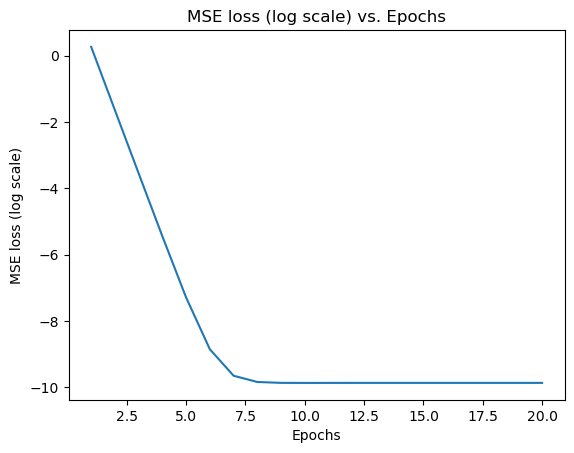

In [142]:
#b)
W_0 = np.matrix([[0], [0], [0]])
num_epoch = 20
lr = 0.01
mse_losses = []

for epoch in range(num_epoch):
    mse_loss = 0
    for i in range(len(X)):
        y_pred = X[i] @ W_0
        error = D[i] - y_pred
        mse_loss += 0.5 * np.square(error) 
        W_0 = W_0 + (lr * X[i].T * error)
    mse_losses.append(mse_loss/len(X))

print("Weights obtained using LMS algorithm: ", W_0)

# plotting MSE loss in log scale vs. Epochs
plt.plot(np.arange(1, num_epoch+1), np.log(np.array(mse_losses).flatten()))
plt.title("MSE loss (log scale) vs. Epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE loss (log scale)")
plt.show()

### 5c)

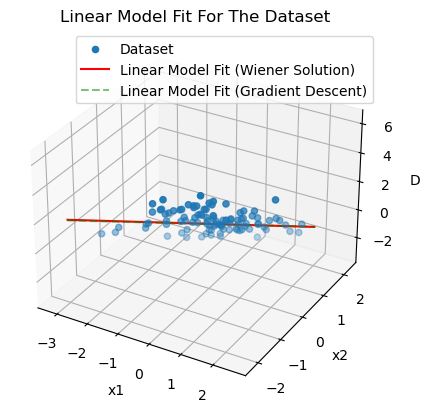

In [168]:
# c) 

# plot a 3d graph 
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,1], X[:, 2], D, label='Dataset')

# plot the linear model fit
x1 = np.linspace(-3, 2, 100)
x2 = np.linspace(-2, 2, 100)
# create a feature matrix with bias
X_pred = np.c_[np.ones((100,1)), x1, x2]
preds_wiener = X_pred @ W_optimal
preds_gradient = X_pred @ W_0

ax.plot3D(X_pred[:, 1], X_pred[:, 2], np.array(preds_wiener).flatten(), 'red', label='Linear Model Fit (Wiener Solution)')
ax.plot3D(X_pred[:, 1], X_pred[:, 2], np.array(preds_gradient).flatten(), 'green', label='Linear Model Fit (Gradient Descent)', ls = '--', alpha = 0.5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('D')
ax.legend()
plt.title("Linear Model Fit For The Dataset")
plt.show()


>ANSWER: From the above graph, we can observe that the Wiener solution (red) obtained from part a) and the linear model obtained using gradient descent from part b) (green) are very similar. In fact, the difference is indistinguishable from the graph as both models overlap each other. Generally speaking, both linear models seem to fit the data fairly well.

### 5d)



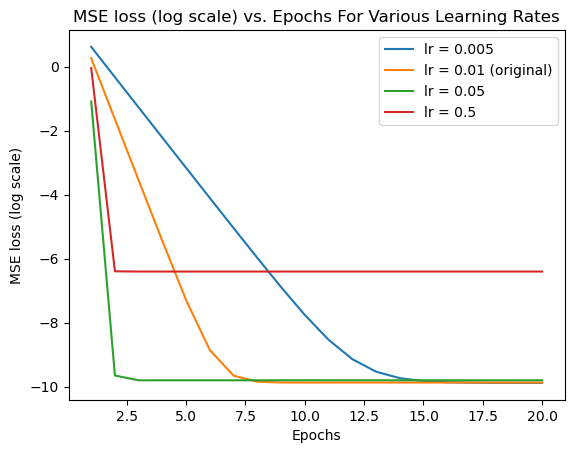

In [163]:
#d)
lrs = [0.005, 0.01, 0.05, 0.5]
for lr in lrs:
    W_gradient = np.matrix([[0], [0], [0]])
    num_epoch = 20
    mse_losses = []

    for epoch in range(num_epoch):
        mse_loss = 0
        for i in range(len(X)):
            y_pred = X[i] @ W_gradient
            error = D[i] - y_pred
            mse_loss += 0.5 * np.square(error)
            W_gradient = W_gradient + (lr * X[i].T * error)
        mse_losses.append(mse_loss/len(X))

    # plotting MSE loss in log scale vs. Epochs
    if lr == 0.01:
        label = "lr = {} (original)".format(lr)
    else:
        label = "lr = {}".format(lr)
    plt.plot(np.arange(1, num_epoch+1), np.log(np.array(mse_losses).flatten()), label=label)

plt.title("MSE loss (log scale) vs. Epochs For Various Learning Rates")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE loss (log scale)")
plt.show()


/var/folders/c3/sk382q8x5470d2tkfr06847w0000gn/T/ipykernel_80877/412600482.py:10: RuntimeWarning: overflow encountered in square
  mse_loss += 0.5 * np.square(error)


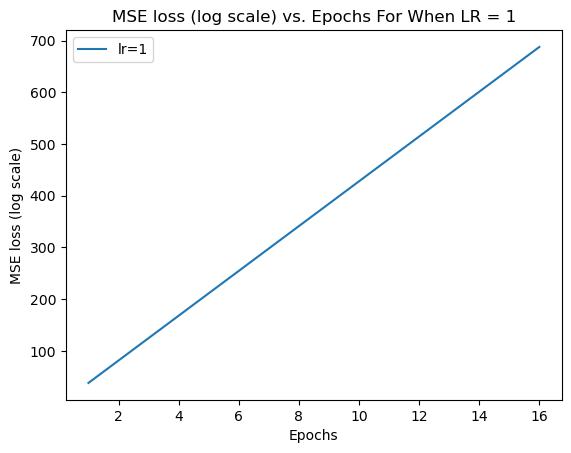

In [166]:
W_gradient = np.matrix([[0], [0], [0]])
num_epoch = 20
mse_losses = []

for epoch in range(num_epoch):
    mse_loss = 0
    for i in range(len(X)):
        y_pred = X[i] @ W_gradient
        error = D[i] - y_pred
        mse_loss += 0.5 * np.square(error)
        W_gradient = W_gradient + (1 * X[i].T * error)
    mse_losses.append(mse_loss/len(X))

plt.plot(np.arange(1, num_epoch+1), np.log(np.array(mse_losses).flatten()), label="lr=1")
plt.title("MSE loss (log scale) vs. Epochs For When LR = 1")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("MSE loss (log scale)")
plt.show()


>ANSWER: the learning rate seems to significnatly influence the value of MSE loss as well as the rate at which the MSE loss is minimized. As an example, a learning rate of 0.5 seems to plateau at a local minimum even when the loss could be further minimized. For the learning rates that we experimented with, 0.05 seems to be an approriate learning rate for our dataset as it reaches (close) to the minimum MSE the soonest. A learning rate of 1 doesn't seem converge to the minimum at all and the MSE loss seems to be only increasing after 10 epochs.